In [2]:
#Importovanie prvych kniznich
import numpy as np 
import pandas as pd 
%matplotlib inline

In [2]:
#instalacia fbprophetu pre neskorsiu predikciu
!pip install fbprophet

     |████████████████████████████████| 61kB 236kB/s eta 0:00:01
     |████████████████████████████████| 67.3MB 7.7kB/s eta 0:00:0110:00:14��███▎          | 44.6MB 487kB/s eta 0:00:47�▍          | 45.0MB 487kB/s eta 0:00:46:00:37     |███████████████████████▋        | 49.7MB 494kB/s eta 0:00:36��█▏      | 52.8MB 494kB/s eta 0:00:30�████████████▊      | 54.1MB 494kB/s eta 0:00:27████████████████████████▍     | 55.3MB 3.2MB/s eta 0:00:04 eta 0:00:04   | 58.4MB 14.5MB/s eta 0:00:01��█████████▍   | 59.8MB 14.5MB/s eta 0:00:01��██████████   | 61.2MB 14.5MB/s eta 0:00:01��███████████████▉  | 62.8MB 2.0MB/s eta 0:00:03��██████████████████▏ | 63.3MB 2.0MB/s eta 0:00:02�█████▎ | 63.6MB 2.0MB/s eta 0:00:02��███████████████████████████ | 64.9MB 247kB/s eta 0:00:10��███████████████████████████ | 65.4MB 247kB/s eta 0:00:08/s eta 0:00:06ta 0:00:02
     |████████████████████████████████| 112kB 6.5MB/s eta 0:00:01
     |████████████████████████████████| 1.2MB 6.4MB/s eta 0:00:01
     |████████████████

  Created wheel for pymeeus: filename=PyMeeus-0.3.7-cp36-none-any.whl size=691115 sha256=69cfd6a5df6eafa804cbd8e824b8502e054695a6b42dc6336b15b1223ada3da3
  Stored in directory: /home/nbuser/.cache/pip/wheels/8d/1a/e7/684cd77a99aac294f976db834fe613b5424f7c4d75ffb0b84d
Successfully built holidays pymeeus
Failed to build fbprophet
    Running setup.py install for fbprophet ... done
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
from fbprophet import Prophet

In [89]:
df = pd.read_csv('Avocado.csv')

In [30]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [31]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [32]:
print('Počet riadkov datasetu:',len(df))
print('Počet stĺpcov datasetu:',len(df.columns))

Počet riadkov datasetu: 18249
Počet stĺpcov datasetu: 14


In [90]:
df.groupby('type').groups

{'conventional': Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
             ...
             9116, 9117, 9118, 9119, 9120, 9121, 9122, 9123, 9124, 9125],
            dtype='int64', length=9126),
 'organic': Int64Index([ 9126,  9127,  9128,  9129,  9130,  9131,  9132,  9133,  9134,
              9135,
             ...
             18239, 18240, 18241, 18242, 18243, 18244, 18245, 18246, 18247,
             18248],
            dtype='int64', length=9123)}

In [9]:
predikcia = 'organic'
df = df[df.type == predikcia]

In [26]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [42]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


Text(0.5, 1.25, 'Korelacia Avokad')

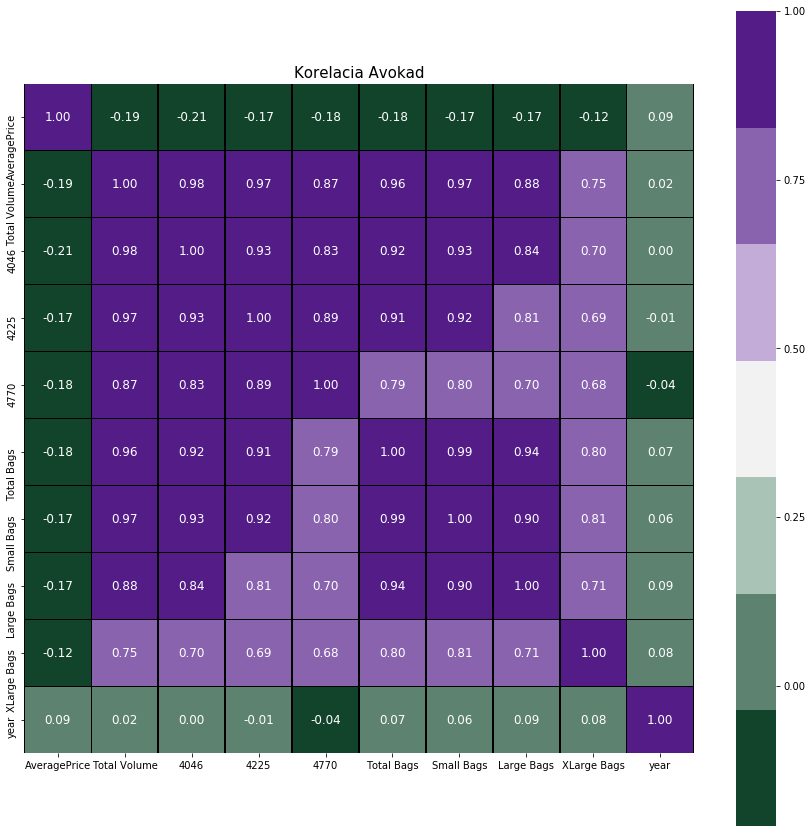

In [49]:
import matplotlib.pyplot as plt
corr = df.iloc[:,1:-1].corr()

colormap = sns.diverging_palette(145, 280, s=85, l=25, n=7)

plt.figure(figsize=(15,15))

sns.heatmap(corr, cbar = True,  square = True, annot = True, fmt='.2f', annot_kws={'size': 12}, cmap = colormap, linewidths=0.25, linecolor='black')

plt.title('Korelacia Avokad', y=1.25, size=15)

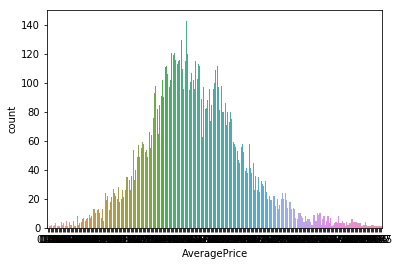

In [20]:
import seaborn as sns
sns.countplot(df['AveragePrice'], label='pocet')

#  ▲ ▼ Grafy zobrazujuce vyvoj priemernej ceny organickych avokad

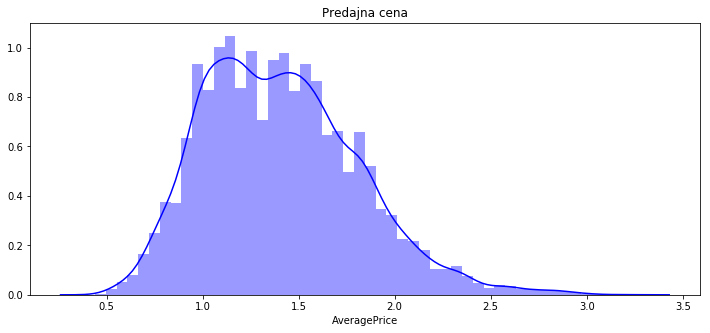

In [41]:
import pylab as pl
pl.figure(figsize=(12,5))
pl.title("Predajna cena")
ax = sns.distplot(df["AveragePrice"], color = 'b')

# zobrazenie vyvoja cien organickych avokad v kazdom regione

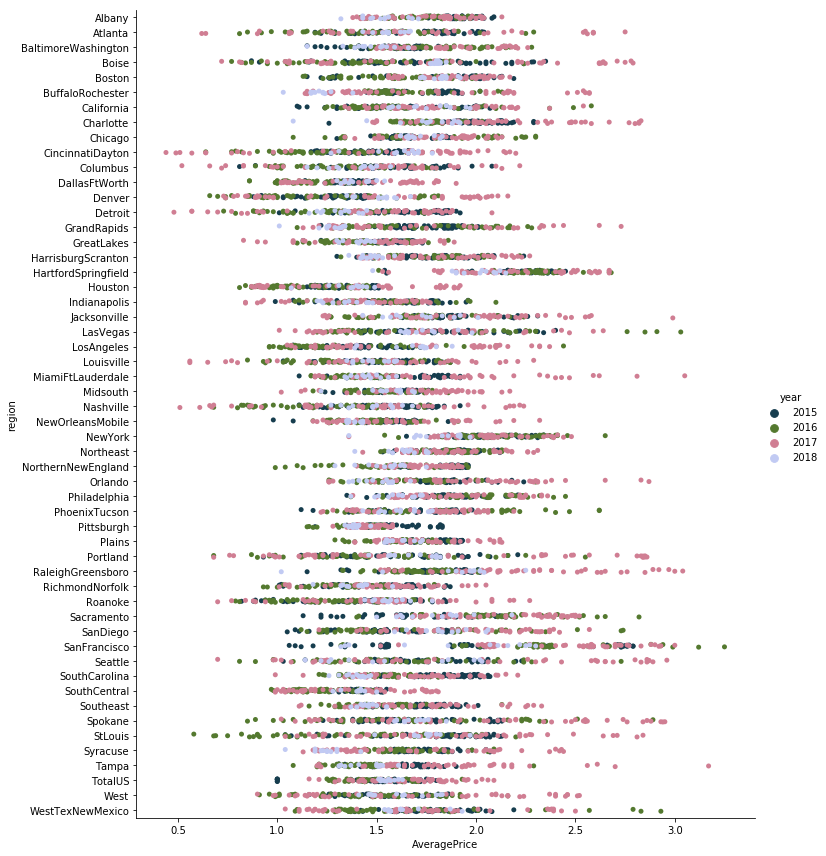

In [40]:
org = df['type']=='organic'
o = sns.catplot('AveragePrice','region',data=df[org],
                   hue='year',
                   height=12,
                   aspect=0.9,
                   palette='cubehelix'                   
              )

In [91]:
df['Date'] = pd.to_datetime(df['Date'])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015,Albany


# vypisanie zoznamu regionov a poctu zaznamov z nich

In [61]:
regiony= df.groupby(df.region)
print("Regiony :", len(regiony))
print("____________________")
for name, group in regiony:
    print(name, " : ", len(group))

Regiony : 54
____________________
Albany  :  338
Atlanta  :  338
BaltimoreWashington  :  338
Boise  :  338
Boston  :  338
BuffaloRochester  :  338
California  :  338
Charlotte  :  338
Chicago  :  338
CincinnatiDayton  :  338
Columbus  :  338
DallasFtWorth  :  338
Denver  :  338
Detroit  :  338
GrandRapids  :  338
GreatLakes  :  338
HarrisburgScranton  :  338
HartfordSpringfield  :  338
Houston  :  338
Indianapolis  :  338
Jacksonville  :  338
LasVegas  :  338
LosAngeles  :  338
Louisville  :  338
MiamiFtLauderdale  :  338
Midsouth  :  338
Nashville  :  338
NewOrleansMobile  :  338
NewYork  :  338
Northeast  :  338
NorthernNewEngland  :  338
Orlando  :  338
Philadelphia  :  338
PhoenixTucson  :  338
Pittsburgh  :  338
Plains  :  338
Portland  :  338
RaleighGreensboro  :  338
RichmondNorfolk  :  338
Roanoke  :  338
Sacramento  :  338
SanDiego  :  338
SanFrancisco  :  338
Seattle  :  338
SouthCarolina  :  338
SouthCentral  :  338
Southeast  :  338
Spokane  :  338
StLouis  :  338
Syracuse 

In [62]:
PREDICTING_FOR = "Tampa" #zvoleny region pre predikciu

In [63]:
date_price = regiony.get_group(PREDICTING_FOR)[['Date', 'AveragePrice']].reset_index(drop=True)

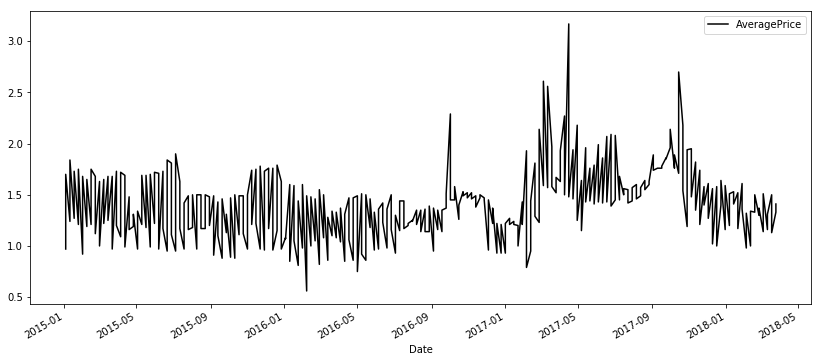

In [69]:
date_price.plot(x='Date', y='AveragePrice', kind="line", color='black', figsize=(14,6)) 
# graf vyvoju ceny v regione tampa

In [70]:
date_price = date_price.rename(columns={'Date':'ds', 'AveragePrice':'y'})

In [71]:
p = Prophet()
p.fit(date_price)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [73]:
buducnost = p.make_future_dataframe(periods=365)
predpoved = p.predict(buducnost)

In [76]:
predpoved 

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.377147,0.811403,1.599929,1.377147,1.377147,-0.152487,-0.152487,-0.152487,-0.152487,-0.152487,-0.152487,0.0,0.0,0.0,1.224661
1,2015-01-04,1.377147,0.844152,1.601597,1.377147,1.377147,-0.152487,-0.152487,-0.152487,-0.152487,-0.152487,-0.152487,0.0,0.0,0.0,1.224661
2,2015-01-11,1.375595,0.878100,1.639750,1.375595,1.375595,-0.111700,-0.111700,-0.111700,-0.111700,-0.111700,-0.111700,0.0,0.0,0.0,1.263895
3,2015-01-11,1.375595,0.908615,1.661629,1.375595,1.375595,-0.111700,-0.111700,-0.111700,-0.111700,-0.111700,-0.111700,0.0,0.0,0.0,1.263895
4,2015-01-18,1.374043,0.932045,1.675851,1.374043,1.374043,-0.074659,-0.074659,-0.074659,-0.074659,-0.074659,-0.074659,0.0,0.0,0.0,1.299384
5,2015-01-18,1.374043,0.885831,1.696951,1.374043,1.374043,-0.074659,-0.074659,-0.074659,-0.074659,-0.074659,-0.074659,0.0,0.0,0.0,1.299384
6,2015-01-25,1.372491,0.913045,1.687602,1.372491,1.372491,-0.084560,-0.084560,-0.084560,-0.084560,-0.084560,-0.084560,0.0,0.0,0.0,1.287931
7,2015-01-25,1.372491,0.883266,1.670344,1.372491,1.372491,-0.084560,-0.084560,-0.084560,-0.084560,-0.084560,-0.084560,0.0,0.0,0.0,1.287931
8,2015-02-01,1.370939,0.825964,1.598384,1.370939,1.370939,-0.138155,-0.138155,-0.138155,-0.138155,-0.138155,-0.138155,0.0,0.0,0.0,1.232784
9,2015-02-01,1.370939,0.863562,1.606826,1.370939,1.370939,-0.138155,-0.138155,-0.138155,-0.138155,-0.138155,-0.138155,0.0,0.0,0.0,1.232784


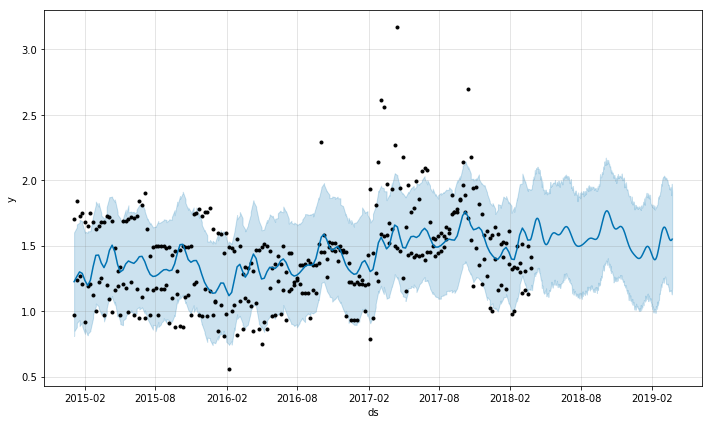

In [210]:
graf = p.plot(predpoved)

# fpprophet predikcia znazornena grafom

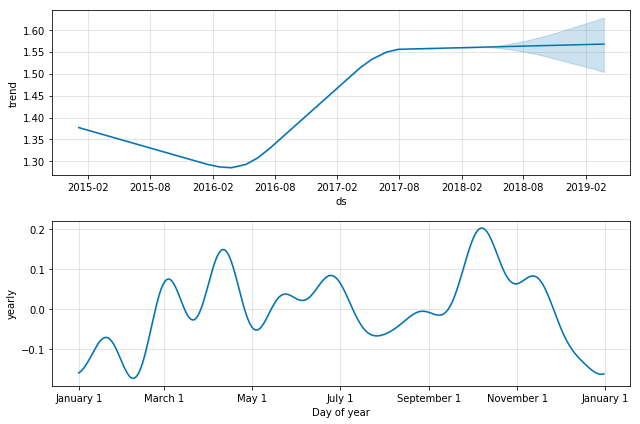

In [79]:
graf2 = p.plot_components(predpoved)

# pokus s pfprophetom sa tu konci. Idem pouzivat keras

In [92]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [156]:
df1=df.replace({'organic': 2, 'conventional' : 1})
df1
# nahradzam hodnoty string s int

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,1,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,1,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,1,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,1,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,1,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,1,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,1,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,1,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,1,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,1,2015,Albany


In [157]:
#x = AveragePrice a Total VOlume  //  y = type
train_x = df1.iloc[:,2:4].values
train_y = df1.iloc[:,11].values

In [100]:
import tensorflow as tf 
from tensorflow import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
#import potrebnych veci

In [158]:
kategoricka_premenna = np_utils.to_categorical(train_y)

In [159]:
kategoricka_premenna

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [203]:
df1.shape

(18249, 14)

#1 zadame vstupne vrstvy s 250 neuronmi, aktivacnu funkciu
#2 potom zadavame skrytu vsrtvu s 250 neuronmi a s  tou istou funkciou
#3 potom vystupnu vrstvu s 3 neuronmi
#4 kompilujeme s optmizerom sgd 

In [195]:
model = Sequential()
model.add(Dense(250,input_dim=2, activation='sigmoid'))
model.add(Dense(250,activation='sigmoid'))
model.add(Dense(3))
model.compile(loss='mean_squared_error', optimizer='sgd',metrics=['accuracy'])

In [196]:
scores = model.fit(train_x, kategoricka_premenna, epochs = 100, validation_split=0.2)

Train on 14599 samples, validate on 3650 samples
Epoch 1/100
14599/14599 [==============================] - 3s 228us/step - loss: 0.1591 - accuracy: 0.6232 - val_loss: 0.2278 - val_accuracy: 0.0000e+00
Epoch 2/100
14599/14599 [==============================] - 3s 200us/step - loss: 0.1580 - accuracy: 0.6209 - val_loss: 0.3144 - val_accuracy: 0.0000e+00
Epoch 3/100
14599/14599 [==============================] - 3s 221us/step - loss: 0.1581 - accuracy: 0.6233 - val_loss: 0.2582 - val_accuracy: 0.0000e+00
Epoch 4/100
14599/14599 [==============================] - 3s 213us/step - loss: 0.1579 - accuracy: 0.6226 - val_loss: 0.3666 - val_accuracy: 0.0000e+00
Epoch 5/100
14599/14599 [==============================] - 4s 268us/step - loss: 0.1583 - accuracy: 0.6220 - val_loss: 0.3023 - val_accuracy: 0.0000e+00
Epoch 6/100
14599/14599 [==============================] - 4s 255us/step - loss: 0.1585 - accuracy: 0.6244 - val_loss: 0.2407 - val_accuracy: 0.0000e+00
Epoch 7/100
14599/14599 [========

14599/14599 [==============================] - 4s 242us/step - loss: 0.1577 - accuracy: 0.6242 - val_loss: 0.2908 - val_accuracy: 0.0000e+00
Epoch 55/100
14599/14599 [==============================] - 3s 199us/step - loss: 0.1578 - accuracy: 0.6240 - val_loss: 0.2347 - val_accuracy: 0.0000e+00
Epoch 56/100
14599/14599 [==============================] - 3s 186us/step - loss: 0.1580 - accuracy: 0.6248 - val_loss: 0.2559 - val_accuracy: 0.0000e+00
Epoch 57/100
14599/14599 [==============================] - 3s 202us/step - loss: 0.1578 - accuracy: 0.6251 - val_loss: 0.2408 - val_accuracy: 0.0000e+00
Epoch 58/100
14599/14599 [==============================] - 4s 245us/step - loss: 0.1580 - accuracy: 0.6232 - val_loss: 0.3226 - val_accuracy: 0.0000e+00
Epoch 59/100
14599/14599 [==============================] - 4s 270us/step - loss: 0.1575 - accuracy: 0.6243 - val_loss: 0.1591 - val_accuracy: 1.0000
Epoch 60/100
14599/14599 [==============================] - 3s 231us/step - loss: 0.1578 - ac

In [197]:
model.evaluate(train_x, kategoricka_premenna)

18249/18249 [==============================] - 2s 85us/step


[0.19420486223835495, 0.5000821948051453]

In [200]:
print("Presnost: %.2f%%" %
    ( 100*scores.history['accuracy'][-1]))
print("Chybovost: %.2f%% "  % 
    ( 100*scores.history['loss'][-1]))

Presnost: 62.46%
Chybovost: 15.77% 


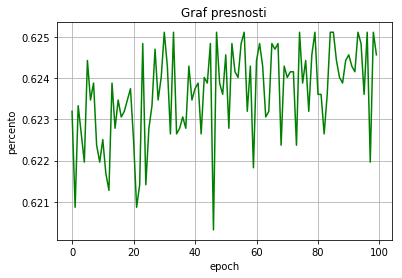

In [199]:
plt.plot(scores.history['accuracy'], color='g')
plt.title('Graf presnosti')
plt.ylabel('percento')
plt.xlabel('epoch')
plt.grid()
plt.show()

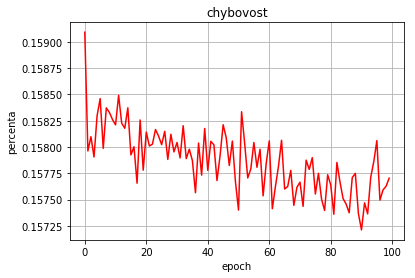

In [201]:
plt.plot(scores.history['loss'], color='r')
plt.title('chybovost')
plt.ylabel('percenta')
plt.xlabel('epoch')
plt.grid()
plt.show()